<a href="https://colab.research.google.com/github/Ahmadfikriand/R-and-Python-Code/blob/master/Kernel_Trick_Ahmad_Fikri_Andrismono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membuat dataframe
y = [-1, -1, -1, 1, 1, 1, -1, -1, -1]
x = [1.2, 2.7, 4.2, 5.5, 7.8, 9.1, 10.2, 10.6, 11.8]

df = pd.DataFrame({'X':x, 'y':y})
df

,X,y
0,1.2,-1
1,2.7,-1
2,4.2,-1
3,5.5,1
4,7.8,1
5,9.1,1
6,10.2,-1
7,10.6,-1
8,11.8,-1


**Lalu, lakukan transformasi Kernel dengan fungsi:**

𝜅(𝐱, 𝐲) = 𝜙(𝐱)^T𝜙(𝐱) dimana 𝜙(𝐱) =
[𝑥1, 𝑥1^
2
, 𝑥2, 𝑥2^
2
, √2𝑥1𝑥2, ½]^T

In [3]:
# Membuat fungsi 𝜙(𝐱)
def pi_x(x):
  x1 = x
  x2 = x1**2
  x3 = x2
  x4 = x2**2
  x5 = math.sqrt(2)*x1*x2
  x6 = 0.5

  return [x1,x2,x3,x4,x5,x6]

df['pi_x']= df['X'].apply(lambda x : pi_x(x))
df

,X,y,pi_x
0,1.2,-1,"[1.2, 1.44, 1.44, 2.0736, 2.443761035780708, 0.5]"
1,2.7,-1,"[2.7, 7.290000000000001, 7.290000000000001, 53..."
2,4.2,-1,"[4.2, 17.64, 17.64, 311.1696, 104.776254409097..."
3,5.5,1,"[5.5, 30.25, 30.25, 915.0625, 235.289781439823..."
4,7.8,1,"[7.8, 60.839999999999996, 60.839999999999996, ..."
5,9.1,1,"[9.1, 82.80999999999999, 82.80999999999999, 68..."
6,10.2,-1,"[10.2, 104.03999999999999, 104.03999999999999,..."
7,10.6,-1,"[10.6, 112.36, 112.36, 12624.7696, 1684.350980..."
8,11.8,-1,"[11.8, 139.24, 139.24, 19387.7776, 2323.598137..."


In [4]:
# Transformasi kernel dengan fungsi 𝜅(𝐱, 𝐲) = 𝜙(𝐱) T𝜙(𝐱)
def kernel_transform(x):
  # Ubah list menjadi matrix
  x_matrix = np.array(x)

  # Ubah matrix jadi matrix kolom
  x_matrix = x_matrix.reshape(-1, 1)

  # Lakukan perkalian matrix dengan dirinya sendiri
  result_matrix = np.dot(x_matrix.T, x_matrix)

  return result_matrix[0][0]

df['kernel_transform_x'] = df['pi_x'].apply(lambda x : kernel_transform(x))
df

,X,y,pi_x,kernel_transform_x
0,1.2,-1,"[1.2, 1.44, 1.44, 2.0736, 2.443761035780708, 0.5]",1.610898e+01
1,2.7,-1,"[2.7, 7.290000000000001, 7.290000000000001, 53...",3.712965e+03
2,4.2,-1,"[4.2, 17.64, 17.64, 311.1696, 104.776254409097...",1.084448e+05
3,5.5,1,"[5.5, 30.25, 30.25, 915.0625, 235.289781439823...",8.945613e+05
4,7.8,1,"[7.8, 60.839999999999996, 60.839999999999996, ...",1.415901e+07
5,9.1,1,"[9.1, 82.80999999999999, 82.80999999999999, 68...",4.817479e+07
6,10.2,-1,"[10.2, 104.03999999999999, 104.03999999999999,...",1.194400e+08
7,10.6,-1,"[10.6, 112.36, 112.36, 12624.7696, 1684.350980...",1.622472e+08
8,11.8,-1,"[11.8, 139.24, 139.24, 19387.7776, 2323.598137...",3.813239e+08


**Untuk lebih memahami lihat grafik di bawah ini:**

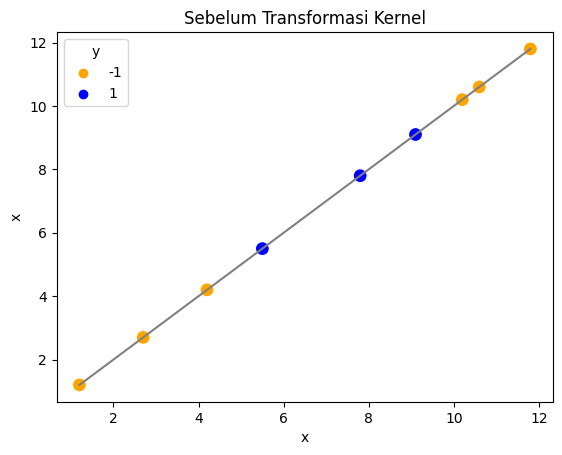

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with hue
sns.scatterplot(x='X', y='X', hue='y', data=df, palette={-1: 'orange', 1: 'blue'}, marker='o', s=100)

# Add the line x=y
plt.plot(df['X'], df['X'], color='gray', linestyle='-')

# Customization
plt.xlabel('x')
plt.ylabel('x')
plt.title('Sebelum Transformasi Kernel')

# Display the plot
plt.show()

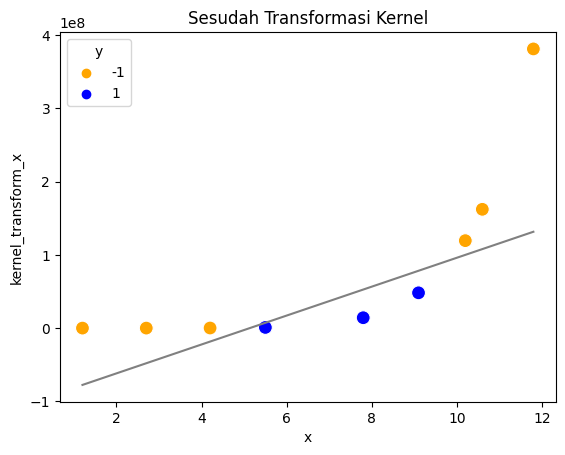

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with hue
sns.scatterplot(x='X', y='kernel_transform_x', hue='y', data=df, palette={-1: 'orange', 1: 'blue'}, marker='o', s=100)

# Add the line x=y
plt.plot(df['X'], 19736842.1052632*df['X']-101315789.473684, color='gray', linestyle='-')

# Customization
plt.xlabel('x')
plt.ylabel('kernel_transform_x')
plt.title('Sesudah Transformasi Kernel')

# Display the plot
plt.show()